<a href="https://colab.research.google.com/github/vishnupm-22/Credit_Card_Fraud_Detection/blob/main/Creditcard_Frauddetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [189]:
credit_data = pd.read_csv('/content/drive/MyDrive/Data_sets/dataset_credit.csv')

In [190]:
credit_data.shape

(284807, 31)

In [191]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [192]:
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [193]:
credit_data.duplicated().sum()

1081

In [194]:
credit_data= credit_data.drop_duplicates(keep='first')

In [195]:
credit_data.shape

(283726, 31)

In [196]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


**EDA**

*  **bar and pie plot** : shows that data is highly imbalanced (only 0.17 % data contributes to fraud )

In [197]:
credit_data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

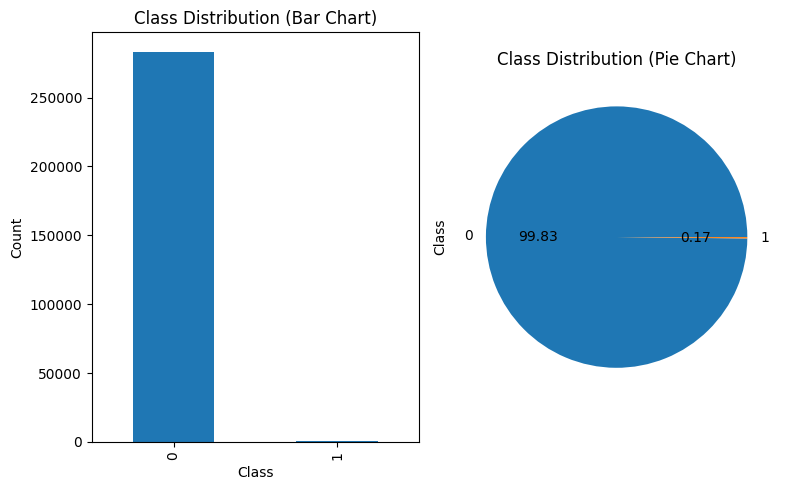

In [198]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

# Bar chart
credit_data['Class'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Class Distribution (Bar Chart)')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Pie chart
credit_data['Class'].value_counts().plot(kind='pie', autopct='%0.2f', ax=axes[1])
axes[1].set_title('Class Distribution (Pie Chart)')

plt.tight_layout()
plt.show()


Feeding Unbalanced data to model will result in :
  * Biased Model
  * Overfitting
  * Misleading Accuracy

**Under Sampling Technique**
  * Undersampling involves randomly removing samples from the over-represented class (legitimate transactions) to balance the class distribution and create a more balanced dataset for training machine learning models.

In [199]:
legit = credit_data[credit_data['Class']==0]
fraud = credit_data[credit_data['Class']==1]

legit_sam = legit.sample(n = 492)  # takes any n samples
new_dataset = pd.concat([legit_sam,fraud],axis=0)  # row wise
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
130903,79457.0,-0.545209,0.188763,2.106640,0.917867,-0.645458,0.111732,0.054341,0.237451,0.200952,...,0.264300,0.842744,0.052880,0.457705,-0.438234,0.591538,0.135557,0.151499,69.99,0
211645,138498.0,-2.589109,-3.217915,2.152656,-2.156838,2.393353,-2.434838,-1.870378,0.288581,1.795076,...,0.379514,0.426844,0.336089,0.002793,-0.101991,-0.430759,-0.134195,-0.037836,9.99,0
169684,119808.0,-0.497963,0.446631,1.554311,-1.074136,0.559950,0.381035,0.210877,0.177830,0.268744,...,0.076052,0.238302,-0.117538,0.120646,-0.382264,0.043854,0.129063,0.169043,15.00,0
156843,109028.0,-0.818376,1.144240,-0.237920,-0.219919,-0.230443,-0.724080,-0.025918,0.692724,0.966501,...,0.203242,0.664657,-0.177879,0.080525,-0.055146,0.592966,-0.405989,-0.119911,11.50,0
255105,157066.0,2.053064,-0.096573,-1.077037,0.414020,-0.158654,-1.141418,0.134952,-0.279718,0.618460,...,-0.289346,-0.717898,0.353163,-0.027408,-0.330978,0.202799,-0.070946,-0.061610,1.79,0


In [200]:
print(new_dataset.shape)

(965, 31)


<Axes: ylabel='Class'>

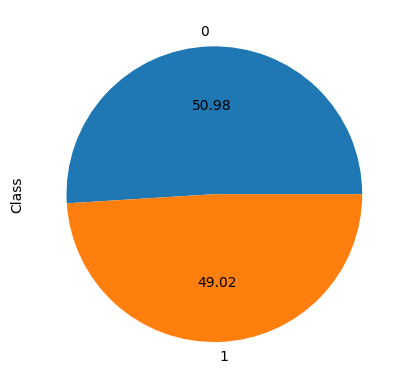

In [201]:
new_dataset['Class'].value_counts().plot(kind='pie', autopct='%0.2f')

**Timed based analysis**

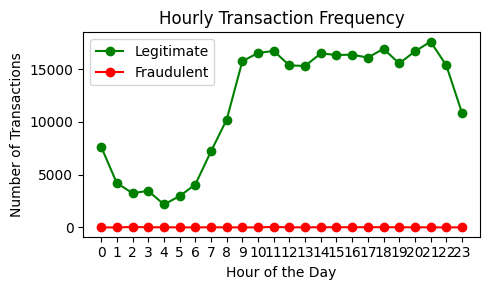

In [202]:
# Convert the 'Time' column to hours
credit_data['Hour'] = (credit_data['Time'] // 3600) % 24  # Assuming 1 day = 24 hours * 60 minutes * 60 seconds

# Group data by hour and count transactions for legitimate and fraudulent cases
legit_hourly_counts = credit_data[credit_data['Class'] == 0].groupby('Hour').size()
fraud_hourly_counts = credit_data[credit_data['Class'] == 1].groupby('Hour').size()
plt.figure(figsize=(5,3))
plt.plot(legit_hourly_counts.index, legit_hourly_counts.values, marker='o', color='green', linestyle='-', label='Legitimate')

plt.plot(fraud_hourly_counts.index, fraud_hourly_counts.values, marker='o', color='red', linestyle='-', label='Fraudulent')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Hourly Transaction Frequency')
plt.xticks(range(24))
plt.legend()
plt.tight_layout()
plt.show()

**Amount based analysis**

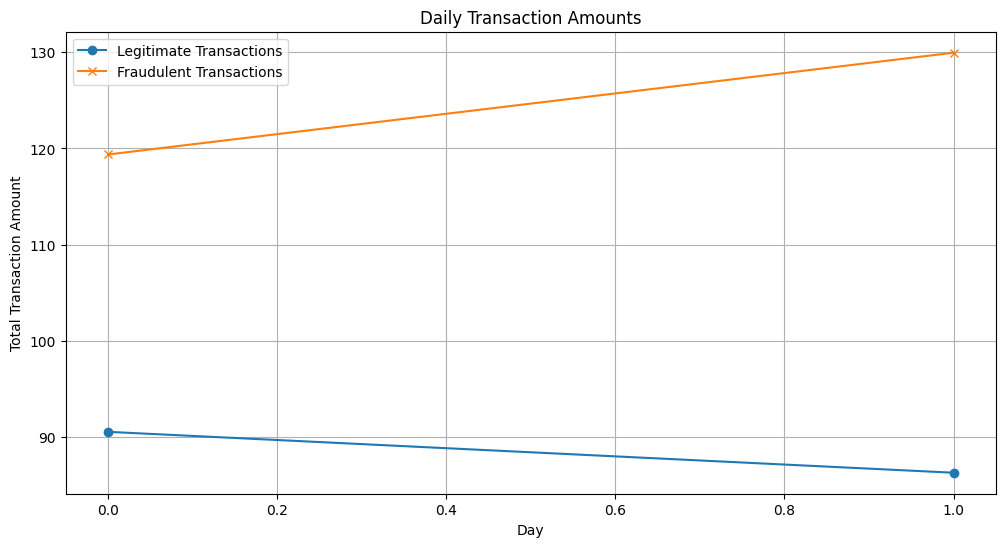

In [203]:
credit_data['Day'] = (credit_data['Time'] // 86400)

Transaction_Amount_legit = credit_data[credit_data['Class'] == 0].groupby('Day')['Amount'].aggregate('mean').reset_index()
Transaction_Amount_fraud =  credit_data[credit_data['Class'] == 1].groupby('Day')['Amount'].aggregate('mean').reset_index()

import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(Transaction_Amount_legit['Day'], Transaction_Amount_legit['Amount'], label='Legitimate Transactions', marker='o')
plt.plot(Transaction_Amount_fraud['Day'], Transaction_Amount_fraud['Amount'], label='Fraudulent Transactions', marker='x')

plt.xlabel('Day')
plt.ylabel('Total Transaction Amount')
plt.title('Daily Transaction Amounts')
plt.legend()
plt.grid(True)
plt.show()


In [204]:
Transaction_Amount_legit

,Day,Amount
0,0.0,90.506027
1,1.0,86.250893


In [205]:
Transaction_Amount_fraud

,Day,Amount
0,0.0,119.371103
1,1.0,129.962438


**correlation analysis**

In [206]:
X = new_dataset.drop(columns = 'Class',axis =1)
y = new_dataset['Class']

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=Y, random_state=2)

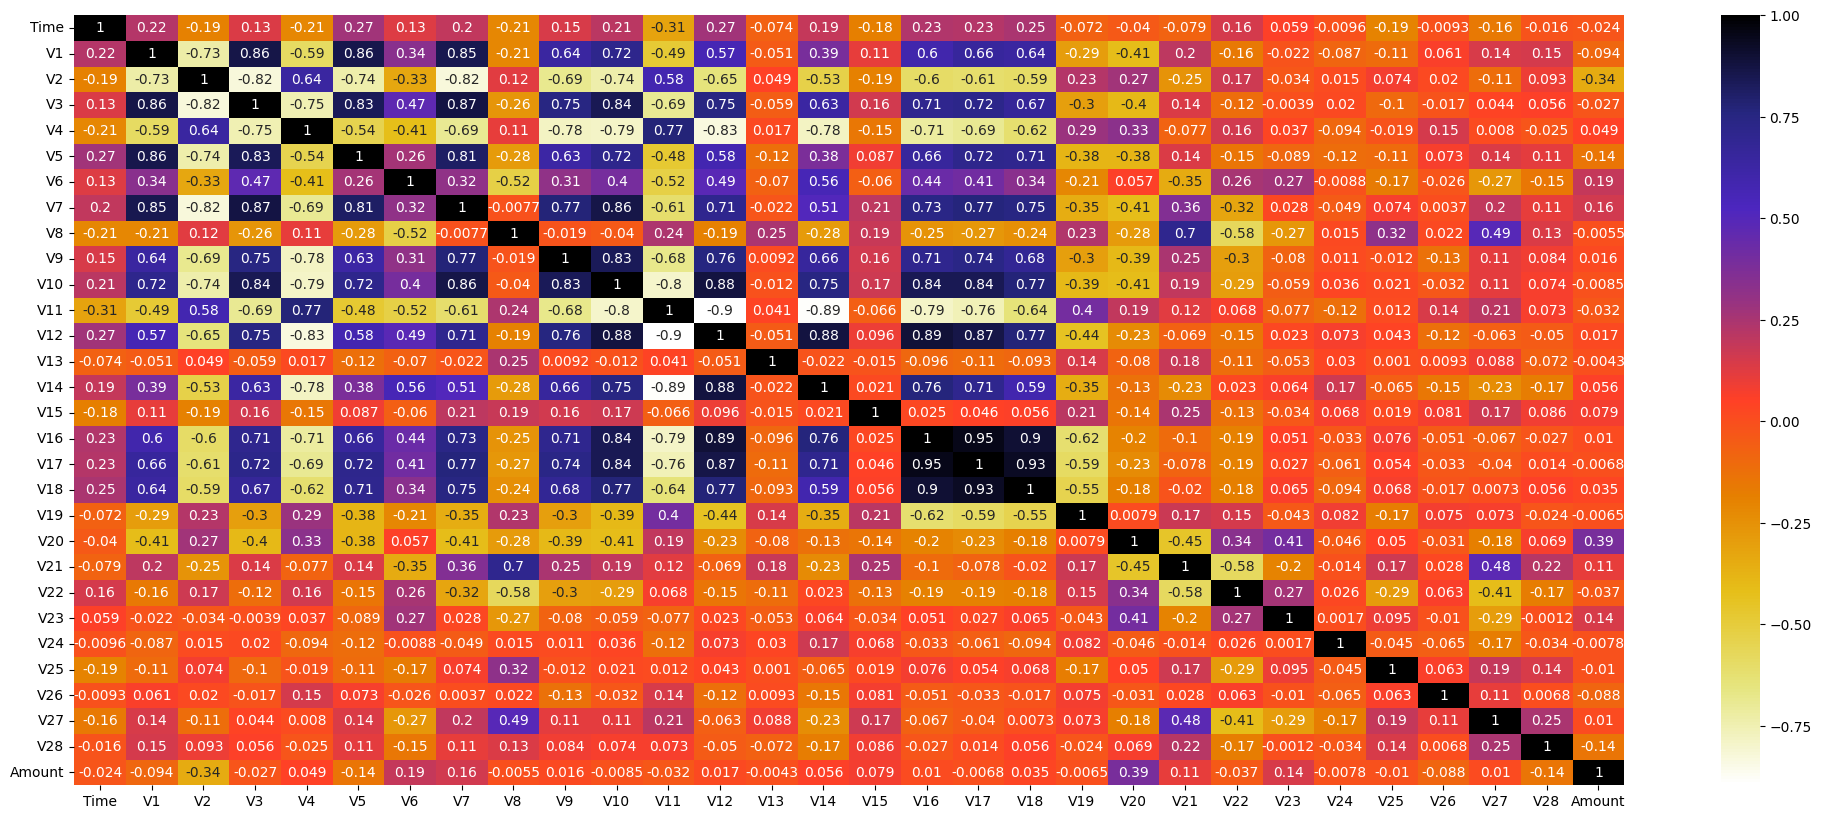

In [209]:
import seaborn as sns
plt.figure(figsize=(25,10))
corr= X_train.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [210]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [211]:
corr_features = correlation(X_train, 0.80)
len(set(corr_features))

9

In [212]:
corr_features

{'V10', 'V12', 'V14', 'V16', 'V17', 'V18', 'V3', 'V5', 'V7'}

In [213]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)
X.drop(corr_features,axis=1)

,Time,V1,V2,V4,V6,V8,V9,V11,V13,V15,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
130903,79457.0,-0.545209,0.188763,0.917867,0.111732,0.237451,0.200952,-0.500365,-0.903224,0.707509,...,0.156543,0.264300,0.842744,0.052880,0.457705,-0.438234,0.591538,0.135557,0.151499,69.99
211645,138498.0,-2.589109,-3.217915,-2.156838,-2.434838,0.288581,1.795076,0.810121,-0.875890,0.307396,...,0.679484,0.379514,0.426844,0.336089,0.002793,-0.101991,-0.430759,-0.134195,-0.037836,9.99
169684,119808.0,-0.497963,0.446631,-1.074136,0.381035,0.177830,0.268744,-1.580350,1.532859,-0.056560,...,0.012372,0.076052,0.238302,-0.117538,0.120646,-0.382264,0.043854,0.129063,0.169043,15.00
156843,109028.0,-0.818376,1.144240,-0.219919,-0.724080,0.692724,0.966501,0.989718,0.603771,-2.520841,...,-0.499780,0.203242,0.664657,-0.177879,0.080525,-0.055146,0.592966,-0.405989,-0.119911,11.50
255105,157066.0,2.053064,-0.096573,0.414020,-1.141418,-0.279718,0.618460,-0.779012,-0.458050,0.144243,...,-0.263890,-0.289346,-0.717898,0.353163,-0.027408,-0.330978,0.202799,-0.070946,-0.061610,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,1.749293,-2.010494,0.697211,-2.064945,2.115795,-1.235123,0.401701,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,1.411850,-1.326536,0.248525,-1.127396,2.858466,-0.792532,-0.613803,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,0.468308,-0.003346,1.210158,-0.652250,1.794969,-0.418950,-0.712616,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,1.817092,-2.943548,1.058733,-1.632333,1.933520,-1.127455,0.141237,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


**To Check the outliers**

In [214]:
# Calculate Q1 and Q3 for each column
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)

# Calculate the IQR for each column
IQR = Q3 - Q1

# Identify outliers based on IQR
outliers_iqr = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))

# Print or visualize the outliers based on IQR
print(outliers_iqr.sum())

Time        0
V1         88
V2         82
V3         80
V4         17
V5        121
V6         83
V7        119
V8        157
V9         49
V10        77
V11        23
V12        45
V13         7
V14         9
V15        10
V16        61
V17        83
V18       118
V19        45
V20       107
V21       107
V22        17
V23       125
V24         9
V25        50
V26         5
V27       154
V28       128
Amount    115
dtype: int64


**Model Training & Evaluation**

In [215]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import svm
trf1 = ColumnTransformer([
    ('scaler', RobustScaler(), slice(0, 30))
])

pipeline_lr = Pipeline([
    ('preprocessor', trf1),
    ('classifier', LogisticRegression())
])

pipeline_rf = Pipeline([
    ('preprocessor', trf1),
    ('classifier1', RandomForestClassifier(n_estimators=100,random_state=42,max_features=10,max_depth=20))
])

pipeline_svm = Pipeline([
    ('preprocessor', trf1),
    ('classifier', svm.SVC(kernel='linear'))
])


In [216]:
pipeline_lr.fit(X_train, y_train)

pipeline_rf.fit(X_train, y_train)

pipeline_svm.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  slice(0, 30, None))])),
                ('classifier', SVC(kernel='linear'))])

In [217]:
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_svm = pipeline_svm.predict(X_test)

# Calculate precision, recall, and F1-score for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)


# Calculate precision, recall, and F1-score for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_lr)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)


# Calculate precision, recall, and F1-score for SVM
accuracy_svm = accuracy_score(y_test, y_pred_lr)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("-" * 72)
print("| {:<15} | {:<20} | {:<12} | {:<12}|".format("Metric", "Logistic Regression", "SVM", "Random Forest"))
print("-" * 72)
print("| {:<15} | {:<20.4f} | {:<12.4f} | {:<12.4f} |".format("Accuracy", accuracy_lr, accuracy_svm, accuracy_rf))
print("-" * 72)
print("| {:<15} | {:<20.4f} | {:<12.4f} | {:<12.4f} |".format("Precision", precision_lr, precision_svm, precision_rf))
print("-" * 72)
print("| {:<15} | {:<20.4f} | {:<12.4f} | {:<12.4f} |".format("Recall", recall_lr, recall_svm, recall_rf))
print("-" * 72)
print("| {:<15} | {:<20.4f} | {:<12.4f} | {:<12.4f} |".format("F1-score", f1_lr, f1_svm, f1_rf))
print("-" * 72)
# Print confusion matrices
print("\nConfusion Matrix - Logistic Regression:")
print(conf_matrix_lr)

print("\nConfusion Matrix - SVM:")
print(conf_matrix_svm)

print("\nConfusion Matrix - Random Forest:")
print(conf_matrix_rf)

------------------------------------------------------------------------
| Metric          | Logistic Regression  | SVM          | Random Forest|
------------------------------------------------------------------------
| Accuracy        | 0.9326               | 0.9326       | 0.9326       |
------------------------------------------------------------------------
| Precision       | 0.9659               | 0.9444       | 0.9239       |
------------------------------------------------------------------------
| Recall          | 0.8947               | 0.8947       | 0.8947       |
------------------------------------------------------------------------
| F1-score        | 0.9290               | 0.9189       | 0.9091       |
------------------------------------------------------------------------

Confusion Matrix - Logistic Regression:
[[95  3]
 [10 85]]

Confusion Matrix - SVM:
[[93  5]
 [10 85]]

Confusion Matrix - Random Forest:
[[91  7]
 [10 85]]


In [218]:
from sklearn.model_selection import cross_validate
scoring = ['accuracy','precision','recall','f1']
scores = cross_validate(pipeline_lr,X, y,scoring=scoring,cv=10)
scores_rf = cross_validate(pipeline_rf,X, y,scoring=scoring,cv=10)
scores_svm = cross_validate(pipeline_svm,X, y,scoring=scoring,cv=10)

In [219]:
print("-" * 64)
print("| {:<15} | {:<12} | {:<12} | {:<12}|".format("Metric", "Logistic", "SVM", "Random Forest"))
print("-" * 64)
for i in scoring:
    strng = 'test_' + i
    logistic_mean = scores[strng].mean()
    svm_mean = scores_svm[strng].mean()
    rf_mean = scores_rf[strng].mean()
    print("| {:<15} | {:<12.4f} | {:<12.4f} | {:<12.4f} |".format(i.capitalize(), logistic_mean, svm_mean, rf_mean))
    print("-" * 62)

----------------------------------------------------------------
| Metric          | Logistic     | SVM          | Random Forest|
----------------------------------------------------------------
| Accuracy        | 0.9275       | 0.9171       | 0.9368       |
--------------------------------------------------------------
| Precision       | 0.9696       | 0.9673       | 0.9613       |
--------------------------------------------------------------
| Recall          | 0.8796       | 0.8583       | 0.9094       |
--------------------------------------------------------------
| F1              | 0.9208       | 0.9071       | 0.9326       |
--------------------------------------------------------------
